In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os 
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [20]:
data = 'fifa21_male2.csv'
df1 = pd.read_csv(data)

df1

/Users/federicogarciaochoa/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [21]:
for col in df1.columns:
    print(col)

ID
Name
Age
OVA
Nationality
Club
BOV
BP
Position
Player Photo
Club Logo
Flag Photo
POT
Team & Contract
Height
Weight
foot
Growth
Joined
Loan Date End
Value
Wage
Release Clause
Contract
Attacking
Crossing
Finishing
Heading Accuracy
Short Passing
Volleys
Skill
Dribbling
Curve
FK Accuracy
Long Passing
Ball Control
Movement
Acceleration
Sprint Speed
Agility
Reactions
Balance
Power
Shot Power
Jumping
Stamina
Strength
Long Shots
Mentality
Aggression
Interceptions
Positioning
Vision
Penalties
Composure
Defending
Marking
Standing Tackle
Sliding Tackle
Goalkeeping
GK Diving
GK Handling
GK Kicking
GK Positioning
GK Reflexes
Total Stats
Base Stats
W/F
SM
A/W
D/W
IR
PAC
SHO
PAS
DRI
DEF
PHY
Hits
LS
ST
RS
LW
LF
CF
RF
RW
LAM
CAM
RAM
LM
LCM
CM
RCM
RM
LWB
LDM
CDM
RDM
RWB
LB
LCB
CB
RCB
RB
GK
Gender


In [28]:
column_names = df1.columns

list(column_names)

['id',
 'name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'position',
 'player photo',
 'club logo',
 'flag photo',
 'pot',
 'team & contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan date end',
 'value',
 'wage',
 'release clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading accuracy',
 'short passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk accuracy',
 'long passing',
 'ball control',
 'movement',
 'acceleration',
 'sprint speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot power',
 'jumping',
 'stamina',
 'strength',
 'long shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing tackle',
 'sliding tackle',
 'goalkeeping',
 'gk diving',
 'gk handling',
 'gk kicking',
 'gk positioning',
 'gk reflexes',
 'total stats',
 'base stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 

In [29]:
cols = []

for col in column_names:
    cols.append(col.lower().replace(' ', '_'))
    
cols

['id',
 'name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'position',
 'player_photo',
 'club_logo',
 'flag_photo',
 'pot',
 'team_&_contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan_date_end',
 'value',
 'wage',
 'release_clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 

In [30]:
df1

,id,name,age,ova,nationality,club,bov,bp,position,player photo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [31]:
cols = [col.lower() for col in df1.columns] 
cols

['id',
 'name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'position',
 'player photo',
 'club logo',
 'flag photo',
 'pot',
 'team & contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan date end',
 'value',
 'wage',
 'release clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading accuracy',
 'short passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk accuracy',
 'long passing',
 'ball control',
 'movement',
 'acceleration',
 'sprint speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot power',
 'jumping',
 'stamina',
 'strength',
 'long shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing tackle',
 'sliding tackle',
 'goalkeeping',
 'gk diving',
 'gk handling',
 'gk kicking',
 'gk positioning',
 'gk reflexes',
 'total stats',
 'base stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 

In [32]:
no_nulls = set(df1.columns[np.sum(df1.isnull()) == 0])
print(no_nulls)

{'bov', 'fk accuracy', 'ir', 'pac', 'defending', 'id', 'cm', 'sho', 'sm', 'wage', 'height', 'player photo', 'ball control', 'penalties', 'shot power', 'contract', 'rb', 'total stats', 'ls', 'value', 'heading accuracy', 'long passing', 'goalkeeping', 'lcm', 'long shots', 'flag photo', 'crossing', 'team & contract', 'rwb', 'gk reflexes', 'ova', 'rm', 'short passing', 'bp', 'lb', 'dribbling', 'rcb', 'power', 'sprint speed', 'growth', 'stamina', 'gk', 'lm', 'lwb', 'gk kicking', 'rdm', 'def', 'age', 'base stats', 'cam', 'ram', 'rf', 'marking', 'skill', 'ldm', 'gk positioning', 'movement', 'phy', 'gk handling', 'w/f', 'pot', 'mentality', 'reactions', 'nationality', 'lw', 'attacking', 'lf', 'weight', 'name', 'st', 'cb', 'finishing', 'rs', 'lcb', 'gender', 'aggression', 'lam', 'cf', 'gk diving', 'rw', 'standing tackle', 'strength', 'foot', 'cdm', 'release clause', 'dri', 'rcm', 'hits', 'acceleration', 'pas'}


In [33]:
most_25_missing_cols = set(df1.columns[np.sum(df1.isnull())/df1.shape[0] > .25])
most_50_missing_cols = set(df1.columns[np.sum(df1.isnull())/df1.shape[0] > .50])
most_75_missing_cols = set(df1.columns[np.sum(df1.isnull())/df1.shape[0] > .75])

print('The columns with more than 25% of the values: ', most_25_missing_cols)
print('The columns with more than 50% of the values: ', most_50_missing_cols)
print('The columns with more than 75% of the values: ', most_75_missing_cols)

The columns with more than 25% of the values:  {'loan date end'}
The columns with more than 50% of the values:  {'loan date end'}
The columns with more than 75% of the values:  {'loan date end'}


In [34]:
df1 = df1.drop(['loan date end'], axis = 1)

df1.columns
print(df1.columns.tolist())

['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp', 'position', 'player photo', 'club logo', 'flag photo', 'pot', 'team & contract', 'height', 'weight', 'foot', 'growth', 'joined', 'value', 'wage', 'release clause', 'contract', 'attacking', 'crossing', 'finishing', 'heading accuracy', 'short passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk accuracy', 'long passing', 'ball control', 'movement', 'acceleration', 'sprint speed', 'agility', 'reactions', 'balance', 'power', 'shot power', 'jumping', 'stamina', 'strength', 'long shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing tackle', 'sliding tackle', 'goalkeeping', 'gk diving', 'gk handling', 'gk kicking', 'gk positioning', 'gk reflexes', 'total stats', 'base stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',

In [35]:
df1 = df1.drop_duplicates()
df1

,id,name,age,ova,nationality,club,bov,bp,position,player photo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [36]:
df1.describe()

,id,age,ova,bov,pot,growth,attacking,crossing,finishing,heading accuracy,...,gk positioning,gk reflexes,total stats,base stats,pac,sho,pas,dri,def,phy
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,...,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,...,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,...,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,...,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,...,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,243911.000000,29.000000,72.000000,72.000000,76.000000,9.000000,306.000000,65.000000,64.000000,65.000000,...,14.000000,14.000000,1812.000000,390.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,259105.000000,53.000000,93.000000,93.000000,95.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,93.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


In [ ]:
#ranking players per ova

In [37]:
rank_players = df1.sort_values(['ova'],ascending=[False])

selected = rank_players[['name' , 'ova']]
selected

,name,ova
752,L. Messi,93
142,Cristiano Ronaldo,92
2871,K. De Bruyne,91
2287,R. Lewandowski,91
2650,Neymar Jr,91
...,...,...
16143,M. Flores,47
13495,J. Milli,47
9654,A. Dunbar,45
1955,D. Stadelmann,42


In [ ]:
#ranking 10 best players per ova

In [38]:
selected.head(10)

,name,ova
752,L. Messi,93
142,Cristiano Ronaldo,92
2871,K. De Bruyne,91
2287,R. Lewandowski,91
2650,Neymar Jr,91
3665,J. Oblak,91
2790,M. ter Stegen,90
9331,K. Mbappé,90
5777,Alisson,90
4166,V. van Dijk,90


In [42]:
df2 = df1.select_dtypes('object')
df2

,name,nationality,club,bp,position,player photo,club logo,flag photo,team & contract,height,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,"6'0""",...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,"5'10""",...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,"5'9""",...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,"5'11""",...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,"5'7""",...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,"CD Tondela Jun 30, 2021 On Loan","6'6""",...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,W. Rickard,Wales,Burnley,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Burnley 2020 ~ 2021,"5'10""",...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,C. Barrett,England,Burnley,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Burnley 2020 ~ 2022,"5'9""",...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,https://cdn.sofifa.com/teams/209/light_60.png,https://cdn.sofifa.com/flags/ba.png,SK Sturm Graz 2020 ~ 2023,"5'9""",...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [43]:
df3 = df1.select_dtypes(np.number)
df3

,id,age,ova,bov,pot,growth,attacking,crossing,finishing,heading accuracy,...,gk positioning,gk reflexes,total stats,base stats,pac,sho,pas,dri,def,phy
0,2,33,69,71,69,0,313,75,50,59,...,10,12,1929,408,71,59,70,71,68,69
1,16,37,71,70,71,0,337,68,64,61,...,11,11,1906,385,53,69,73,69,58,63
2,27,33,71,71,71,0,337,80,64,41,...,16,7,1770,354,45,68,76,77,36,52
3,36,36,68,70,82,14,264,54,70,60,...,21,21,1348,369,61,66,66,69,47,60
4,41,36,81,82,81,0,367,75,69,54,...,13,7,2014,420,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,22,64,66,69,5,197,35,23,66,...,5,7,1367,302,54,30,37,48,64,69
17121,259090,18,56,58,66,10,248,50,43,50,...,12,11,1529,319,62,46,57,56,43,55
17122,259091,18,56,56,67,11,218,55,34,53,...,12,8,1430,303,63,35,44,52,54,55
17123,259101,20,62,62,73,11,223,62,26,52,...,6,9,1579,335,71,34,58,59,59,54


In [66]:
df4 = df1.fillna(0, inplace=True)
print(df4)

None


In [67]:
df3

,id,age,ova,bov,pot,growth,attacking,crossing,finishing,heading accuracy,...,gk positioning,gk reflexes,total stats,base stats,pac,sho,pas,dri,def,phy
0,2,33,69,71,69,0,313,75,50,59,...,10,12,1929,408,71,59,70,71,68,69
1,16,37,71,70,71,0,337,68,64,61,...,11,11,1906,385,53,69,73,69,58,63
2,27,33,71,71,71,0,337,80,64,41,...,16,7,1770,354,45,68,76,77,36,52
3,36,36,68,70,82,14,264,54,70,60,...,21,21,1348,369,61,66,66,69,47,60
4,41,36,81,82,81,0,367,75,69,54,...,13,7,2014,420,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,22,64,66,69,5,197,35,23,66,...,5,7,1367,302,54,30,37,48,64,69
17121,259090,18,56,58,66,10,248,50,43,50,...,12,11,1529,319,62,46,57,56,43,55
17122,259091,18,56,56,67,11,218,55,34,53,...,12,8,1430,303,63,35,44,52,54,55
17123,259101,20,62,62,73,11,223,62,26,52,...,6,9,1579,335,71,34,58,59,59,54


In [68]:
df5 = df1.isna().sum()
df5

id             0
name           0
age            0
ova            0
nationality    0
              ..
cb             0
rcb            0
rb             0
gk             0
gender         0
Length: 106, dtype: int64

In [ ]:
#prediction model d/w

In [96]:
df1['d/w'] = df1['d/w'].replace('Low', '0')
df1['d/w'] = df1['d/w'].replace('Medium', '1')
df1['d/w'] = df1['d/w'].replace('High', '2')

print(df1['d/w'])

0        2
1        1
2        0
3        0
4        1
        ..
17120    1
17121    1
17122    1
17123    1
17124    1
Name: d/w, Length: 17125, dtype: object


In [109]:
df1['d/w'] = df1['d/w'].astype('int64')

In [110]:
num = df1.select_dtypes(np.number)
num.head()

,id,age,ova,bov,pot,growth,attacking,crossing,finishing,heading accuracy,...,gk reflexes,total stats,base stats,d/w,pac,sho,pas,dri,def,phy
0,2,33,69,71,69,0,313,75,50,59,...,12,1929,408,2,71,59,70,71,68,69
1,16,37,71,70,71,0,337,68,64,61,...,11,1906,385,1,53,69,73,69,58,63
2,27,33,71,71,71,0,337,80,64,41,...,7,1770,354,0,45,68,76,77,36,52
3,36,36,68,70,82,14,264,54,70,60,...,21,1348,369,0,61,66,66,69,47,60
4,41,36,81,82,81,0,367,75,69,54,...,7,2014,420,1,58,70,85,85,63,59


In [111]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17125 entries, 0 to 17124
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17125 non-null  int64  
 1   age               17125 non-null  int64  
 2   ova               17125 non-null  int64  
 3   bov               17125 non-null  int64  
 4   pot               17125 non-null  int64  
 5   growth            17125 non-null  int64  
 6   attacking         17125 non-null  int64  
 7   crossing          17125 non-null  int64  
 8   finishing         17125 non-null  int64  
 9   heading accuracy  17125 non-null  int64  
 10  short passing     17125 non-null  int64  
 11  volleys           17125 non-null  float64
 12  skill             17125 non-null  int64  
 13  dribbling         17125 non-null  int64  
 14  curve             17125 non-null  float64
 15  fk accuracy       17125 non-null  int64  
 16  long passing      17125 non-null  int64 

In [112]:
num.select_dtypes('float64')

,volleys,curve,agility,balance,jumping,interceptions,positioning,vision,composure,sliding tackle
0,58.0,65.0,68.0,68.0,68.0,69.0,63.0,66.0,0.0,69.0
1,68.0,79.0,62.0,72.0,54.0,71.0,72.0,73.0,79.0,40.0
2,75.0,84.0,71.0,75.0,58.0,39.0,69.0,74.0,0.0,30.0
3,0.0,0.0,0.0,0.0,0.0,70.0,72.0,0.0,0.0,0.0
4,79.0,80.0,79.0,75.0,40.0,70.0,78.0,93.0,89.0,56.0
...,...,...,...,...,...,...,...,...,...,...
17120,26.0,26.0,46.0,42.0,70.0,58.0,23.0,29.0,46.0,66.0
17121,41.0,42.0,52.0,68.0,62.0,50.0,55.0,53.0,46.0,56.0
17122,34.0,43.0,54.0,68.0,61.0,55.0,49.0,45.0,43.0,54.0
17123,23.0,43.0,74.0,77.0,72.0,58.0,46.0,56.0,54.0,61.0


In [132]:
num.isna().sum()

id             0
name           0
age            0
ova            0
nationality    0
              ..
cb             0
rcb            0
rb             0
gk             0
gender         0
Length: 106, dtype: int64

In [114]:
y = df1['d/w']
X = num.drop(['d/w'],axis = 1)
X.head()

,id,age,ova,bov,pot,growth,attacking,crossing,finishing,heading accuracy,...,gk positioning,gk reflexes,total stats,base stats,pac,sho,pas,dri,def,phy
0,2,33,69,71,69,0,313,75,50,59,...,10,12,1929,408,71,59,70,71,68,69
1,16,37,71,70,71,0,337,68,64,61,...,11,11,1906,385,53,69,73,69,58,63
2,27,33,71,71,71,0,337,80,64,41,...,16,7,1770,354,45,68,76,77,36,52
3,36,36,68,70,82,14,264,54,70,60,...,21,21,1348,369,61,66,66,69,47,60
4,41,36,81,82,81,0,367,75,69,54,...,13,7,2014,420,58,70,85,85,63,59


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
model = LinearRegression()
model.fit( X_train, y_train)

LinearRegression()

In [119]:
len(X_train)

11987

In [120]:
len(X_test)

5138

In [121]:
predictions = model.predict(X_test)
predictions

array([ 0.66133129,  1.04121266,  1.01842449, ...,  0.85884516,
       -0.18684388,  0.84781501])

In [122]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

r2 =  0.2688073543871038
RMSE =  0.45890037787777943
MSE =  0.21058955681636876
MAE =  0.36092869026941243


In [131]:
def boxcox_transform(num):
    numeric_cols = num.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        num[column] = np.where(df1[column]<=0, np.NAN, num[column]) 
        num[column] = num[column].fillna(num[column].mean())
        transformed_data, ci = stats.boxcox(num[column])
        num[column] = transformed_data
        _ci[column] = [ci] 
    return num, _ci
num, _ci = boxcox_transform(df1)
num.head()

,id,name,age,ova,nationality,club,bov,bp,position,player photo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,1.450600,G. Pasquale,1.167430,57.845587,Italy,Udinese,55.760245,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,1769.834777,Luis García,1.204528,59.503999,Spain,KAS Eupen,54.997169,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,8997.237708,J. Cole,1.167430,59.503999,England,Coventry City,55.760245,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,21991.752973,D. Yorke,1.195759,57.015590,Trinidad &amp; Tobago,Sunderland,54.997169,ST,0,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,32940.006777,Iniesta,1.195759,67.766313,Spain,Vissel Kobe,64.111118,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [129]:
from scipy.special import inv_boxcox
predictions = inv_boxcox(predictions, _ci['d/w'])

In [130]:
results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['d/w'])
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
15195,1.0,NaN,NaN
14193,NaN,NaN,NaN
16722,NaN,NaN,NaN
8037,NaN,NaN,NaN
6350,NaN,NaN,NaN
...,...,...,...
7576,1.0,NaN,NaN
2030,1.0,NaN,NaN
11632,NaN,NaN,NaN
39,1.0,0.881692,0.118308


In [133]:
results.sort_values('diff', ascending=False).head()

,true,pred,diff
19,1.0,1.270834,0.270834
111,1.0,1.263401,0.263401
1427,1.0,0.785695,0.214305
70,1.0,0.814049,0.185951
57,1.0,0.822673,0.177327


<AxesSubplot:xlabel='true', ylabel='pred'>

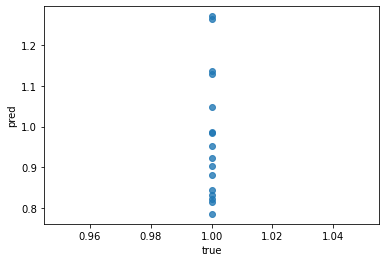

In [134]:
sns.regplot(results['true'], results['pred'])